In [1]:
#Importing Libraries

!pip install plot_keras_history


  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.29-py3-none-any.whl size=8612 sha256=b87137e7054c2e2bcce0995131ba3eec80864dab05eb55d31fa75f50508596e8
  Stored in directory: /root/.cache/pip/wheels/9e/2e/42/17cb826d143226e4d081aa33d3a9b9a90f234dfcf409824b87
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.26-py3-none-any.whl size=7612 sha256=f84d6e4d01cfe104a9836e4c37f892930f2cbf94812010230eace13dcfcdf482
  Stored in directory: /root/.cache/pip/wheels/15/65/34/2e11a0da3cf6f112da5c402e01c454be619ff85a0fb38b3018
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4588 sha256=f69527932ced66a3d268c7a5385b920e1ba729b22344b3b9e13a936620f574ba
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from plot_keras_history import plot_history

In [3]:
#Loading the Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
#Explicit Normalization dataset
x_train, x_test = x_train / 255.0,x_test/ 255.0

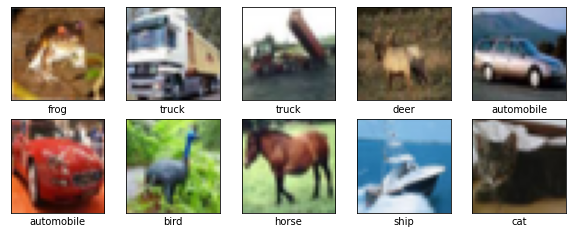

In [5]:
#Examining Samples through visualization
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_labels[y_train[i][0]])
plt.show()

In [6]:
#Construction of Neural Network Model A

class NetA:
  def __init__(self,features,label,vfeatures,vlabel,epochs):
    #Initializying variables
    self.features=features
    self.label=label
    self.vfeatures=vfeatures
    self.vlabel=vlabel
    self.epochs=epochs 
  def buildingnetwork(self):
    #Stacking Model Layers
    model = models.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(10))
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    #Training the model
    history = model.fit(self.features, self.label, epochs=self.epochs, 
                    validation_data=(self.vfeatures, self.vlabel))
    #Plotting the Accuracies
    plt.plot(history.history['accuracy'], label='NetA_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'NetA_val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(self.vfeatures, self.vlabel, verbose=2)
    return history.history['accuracy'],test_acc,history.history['loss'],test_loss



In [7]:
#Construction of Neural Network Model B

class NetB:
  def __init__(self,features,label,vfeatures,vlabel,epochs):
    #Initializying variables
    self.features=features
    self.label=label
    self.vfeatures=vfeatures
    self.vlabel=vlabel
    self.epochs=epochs

  def buildingnetwork(self):
    #Stacking Model Layers 
    model = models.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(300,activation='relu'))
    model.add(layers.Dense(10))
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    #Training the model
    history = model.fit(self.features, self.label, epochs=self.epochs, 
                    validation_data=(self.vfeatures, self.vlabel))
    #Plotting the Accuracies
    plt.plot(history.history['accuracy'], label='NetB_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'NetB_val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(self.vfeatures, self.vlabel, verbose=2)
    return history.history['accuracy'],test_acc,history.history['loss'],test_loss
    



In [8]:

#Construction of Neural Network Model C

class NetC:
  def __init__(self,features,label,vfeatures,vlabel,epochs):
    #Initializying variables
    self.features=features
    self.label=label
    self.vfeatures=vfeatures
    self.vlabel=vlabel
    self.epochs=epochs

  def buildingnetwork(self): 
    #Stacking Model Layers 
    model = models.Sequential()
    model.add(layers.Conv2D(25, (5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10))
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    #Training the model
    history = model.fit(self.features, self.label, epochs=self.epochs, 
                    validation_data=(self.vfeatures, self.vlabel))
    #Plotting the Accuracies
    plt.plot(history.history['accuracy'], label='NetC_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'NetC_val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

    test_loss, test_acc = model.evaluate(self.vfeatures, self.vlabel, verbose=2)
    return history.history['accuracy'],test_acc,history.history['loss'],test_loss



==== Training of Neural Model: NetA ====
Epoch 1/50
1563/1563 [==============================] - 7s 3ms/step - loss: 1.9666 - accuracy: 0.3149 - val_loss: 1.8542 - val_accuracy: 0.3558
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8768 - accuracy: 0.3529 - val_loss: 1.9242 - val_accuracy: 0.3445
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8567 - accuracy: 0.3635 - val_loss: 1.8737 - val_accuracy: 0.3558
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8374 - accuracy: 0.3690 - val_loss: 1.9065 - val_accuracy: 0.3399
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8399 - accuracy: 0.3695 - val_loss: 1.8182 - val_accuracy: 0.3641
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8240 - accuracy: 0.3786 - val_loss: 1.8126 - val_accuracy: 0.3918
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8228 - accuracy: 

(<Figure size 1440x360 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f55702026d0>,
       dtype=object))

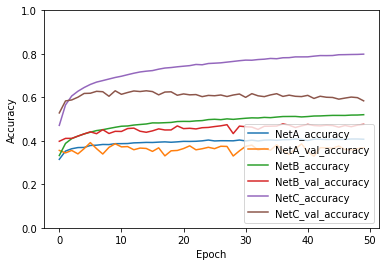

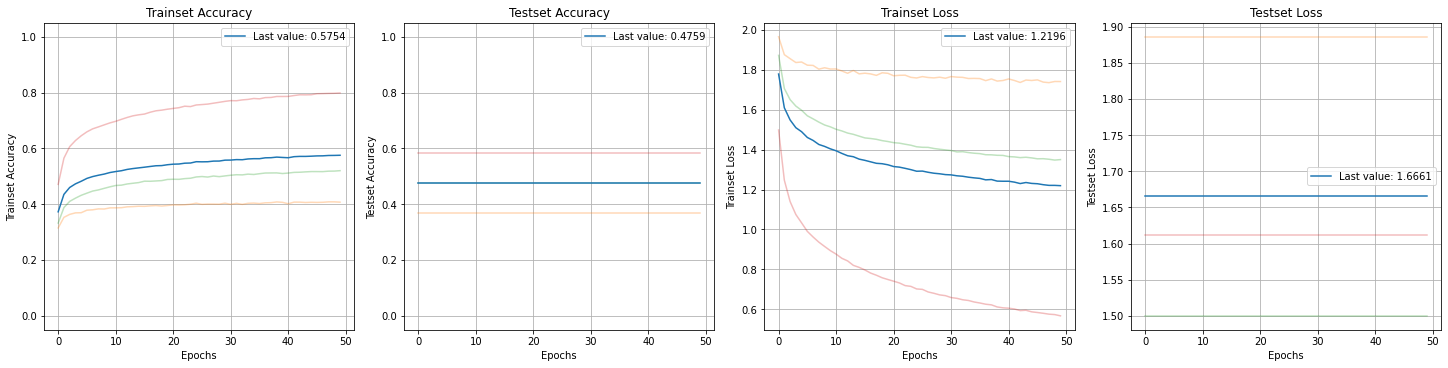

In [9]:
#Consolidated Visualizations of Neural Network A,B,C
NUM_EPOCHS=50
nets = [NetA(x_train,y_train,x_test,y_test,NUM_EPOCHS),NetB(x_train,y_train,x_test,y_test,NUM_EPOCHS),NetC(x_train,y_train,x_test,y_test,NUM_EPOCHS)]
histories = []
for net in nets:
  net_name = type(net).__name__
  print(f'==== Training of Neural Model: {net_name} ====')
  obj=net
  train_acc, test_acc, train_loss,test_loss= obj.buildingnetwork()
  histories.append({
      'Name': net_name,
      'Net': net,
      'Trainset_Accuracy': train_acc,
      'Testset_Accuracy': test_acc,
      'Trainset_Loss':train_loss,
      'Testset_Loss':test_loss
      })

plot_history(histories,path="interpolated.png")

**Observation**: 

1. The Neural Network(Netc) provides best accuracy post training with image data.
2. The Training and validation Accuracy  values of NetC is above threshold of 0.5 rather than NetA and NetB.Hence, This Model is efficient.



